<a href="https://colab.research.google.com/github/Kousikdutta1/Google-Play-Store-App-Review-Analysis/blob/main/Kousik_Dutta_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Name of The Dataset : Google Play Store App Dataset.**

###**In this data analysis we are going to analyze different aspects of google playstore applications. We will perform Exploratory data analysis on different attributes of the data such as Number of reviews, Categories, Number of Downloads to find out which applications and categories are at top of the application.**

## **Brief Introduction of The Dataset -**



*   The application data has been collected from December 2010 to August 2018. This dataset contains 10841 application details which were released by different organizations on the google play store.

*   This dataset contains different Genres and Categories which help application developers to understand the needs of the user and in which category of genre they are interested in.

*  This dataset helps to store different application data with different attributes which helps us to give information about the number of reviews, number of people installed , content ratings etc.



#**Objective of This Project -**




*   Number of Application present according to Category and Genres

*   Installation of application by users according to the categories and Genres.

*   Installation of application by users according to the ratings.

*   Most demanded applications in the playstore.

*   Which categories of paid applications are mostly installed.

*   Identifying the percentages of review sentiments.

*   Factors that affect the installation of application by the user.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
google_playstore_data_file_path = "/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Kousik Dutta/Copy of Play Store Data.csv"
google_playstore_data = pd.read_csv(google_playstore_data_file_path)

##**At first we will display all the Column names, Shape,  Null values and Data types of the google play store dataset.**

In [ ]:
# let's check all the columns present in the dataset.

google_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# let's print first 10 rows of dataset

google_playstore_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# Let's look at the random 10 records of the dataset

google_playstore_data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8074,Absolute RC Heli Simulator,SPORTS,3.9,654,50M,"10,000+",Paid,$4.99,Everyone,Sports,"December 20, 2017",3.29,4.1 and up
3852,Grab Driver,MAPS_AND_NAVIGATION,4.2,301413,48M,"5,000,000+",Free,0,Everyone,Maps & Navigation,"August 1, 2018",5.44.1,4.1 and up
8628,Google Docs,PRODUCTIVITY,4.3,815974,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
146,NOOK: Read eBooks & Magazines,BOOKS_AND_REFERENCE,4.5,155446,Varies with device,"10,000,000+",Free,0,Teen,Books & Reference,"April 25, 2018",Varies with device,Varies with device
6571,Bounce Classic,GAME,4.5,38297,6.4M,"10,000,000+",Free,0,Everyone,Arcade,"July 5, 2018",1.0.8,4.0.3 and up
8430,DrivingTest,FAMILY,2.9,975,45M,"100,000+",Free,0,Everyone,Simulation,"February 27, 2017",5,4.1 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
3036,Mobitee GPS Golf Free,SPORTS,4.2,1904,9.9M,"100,000+",Free,0,Everyone,Sports,"June 11, 2018",2.0.22,2.3 and up
8782,Dr. Chess,GAME,4.1,97209,6.7M,"1,000,000+",Free,0,Everyone,Board,"January 14, 2018",1.41,4.0.3 and up
5072,AF Johannesburg,FAMILY,NaN,3,11M,100+,Free,0,Everyone,Education,"May 2, 2017",1.0.3,4.1 and up


In [ ]:
# Print the last 10 rows of the dataset

google_playstore_data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


##Description of the dataset columns



1.   **App** - The name of the application.
2.   **Category** - Category of the application.
3.   **Rating** - The Rating of the application in the playstore.
4.   **Reviews** - Number of Reviews of the application in the playstore.
5.   **Size** - The Size of the application.
6.   **Install** - Number of Installs of the application.
7.   **Type** - The Type of the application - Free/Paid
8.   **Price** - Price of the application, price is 0 if it is free.
9.   **Content Rating** - The Target audience of the application.
10.  **Genres** - The Genre/class of the application.
11.  **Last Updated** - Date of the last update of the application.
12.  **Current Ver** - Current version of the application.
13.  **Android Ver** - Android Version required to run the particular application.


## Let's check the number of all rows and columns present in the dataset.

In [ ]:
google_playstore_data.shape

(10841, 13)

## Checking the information about all the columns like Datatypes, Null and Non null values.

In [ ]:
google_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* We can see from above information that we do have only one column wth float values, and others are present as object type and also we can see that null values are present in Rating, Type, Content Rating, Current Ver, Android Ver columns.

##Descriptive Statistics - 

In [ ]:
# Now Let's find out the descriptive statistics details of the dataset-

google_playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


* As we can see that only Rating column is showing the descriptive details of the
dataset because it has the float data which we can also encounter in detailed information of the data set.
We can see that maximum value of the Rating column denoted as 19.00, which should not be correct as we know that ratings values must be between 1 to 5.

#**Data Cleaning -**


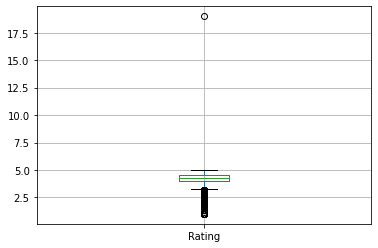

In [ ]:
# As we have found out that the Rating Column has float type dataset, now let's plot a boxplot to see the range of rating.

google_playstore_data.boxplot();

* Now from the above Descriptive Statistics data and boxplot we can see that in Rating column one value lies far outside of the data range which is 19, but as we know that rating must be between 1 to 5 , so this is a outlier which we need to find out and remove it from the dataset. 

In [ ]:
# Let's find that outlier from the Rating column 

google_playstore_data[google_playstore_data["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* We can see that **Rating** of 19.0 is present in index 10472 and also a null
value is present in column **Content Rating** , we must drop this row to get  a clean dataset.

In [ ]:
google_playstore_data.drop(google_playstore_data.index[10472], inplace=True)

Now let's check if the particular row (10472) removed or not.

In [ ]:
google_playstore_data[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


* So now we can see that the particular row is removed from the dataset.

In [ ]:
# let's see the descriptive statistics data for the maximum value of the Rating Column.

google_playstore_data.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


* So, the maximum value is 5.00

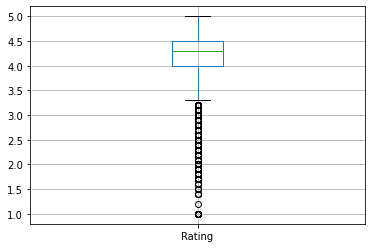

In [ ]:
# Let's plot the boxplot and visualize that the outlier is removed or not.

google_playstore_data.boxplot();


* We can see from above plot that the outlier is removed from the column.

##Let's check count the sum of the null values of all the column 

In [ ]:
google_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

* Now, from the above table we can see that Rating column has the highest null values, and we need to remove those null values to do the analysis.

* Let's update the null values with the median values to get a clearer picture of the "Rating" Column.

In [ ]:
#Let's define a function to replace all the values with median.

def replace_null_values_in_Rating_Column(series):
  ''' 
  This function will change the particular null value with the median
  
  '''
  return series.fillna(series.median())


In [ ]:
google_playstore_data["Rating"]=google_playstore_data["Rating"].transform(replace_null_values_in_Rating_Column)

In [ ]:
# Let's change the Datatype of the column

google_playstore_data["Rating"] = google_playstore_data["Rating"].astype(float)

Now, let's see the rating column, it should have zero null values.

In [ ]:
google_playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# Now let's get the information about all the columns and identify the Rating column.

google_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


* What we can see from above that Rating column has zero null values, all of its values are replaced with the median.

* Now, let's take this operation further and remove all the other null values present in column "Type", "Current Ver", "Android Ver".

In [ ]:
# Let's first print the  mode value of the column "Type"

google_playstore_data["Type"].mode()

0    Free
dtype: object

In [ ]:
# Let's print the  mode value of the column "Current Ver"

google_playstore_data["Current Ver"].mode()

0    Varies with device
dtype: object

In [ ]:
# Lastly print the  mode value of the column "Android Ver"

google_playstore_data["Android Ver"].mode()

0    4.1 and up
dtype: object

In [ ]:
# Let's first replace the null values with the mode value of the column "Type"

google_playstore_data["Type"].fillna(google_playstore_data["Type"].mode().values[0], inplace=True)

# Now, replace the null values with the mode values of the column "Current ver"

google_playstore_data["Current Ver"].fillna(google_playstore_data["Current Ver"].mode().values[0], inplace=True)

# Lastly replace the null values with the mode values of the column "Android Ver"

google_playstore_data["Android Ver"].fillna(google_playstore_data["Android Ver"].mode().values[0], inplace=True)

In [ ]:
# Let's find out the null values are removed or not.

google_playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

* From the above table it can be seen that the dataset does not contain any null value.

##**Now, let's remove the special symbols present in our dataset.**

In [ ]:
# First check the special symbols present in the column "Price"

google_playstore_data["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

* Now, from above it can be concluded that "Price" column has the special symbol of "$"

In [ ]:
# Next check the special symbols present in the column "Installs"

google_playstore_data["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

* From the above table it can be said that column "Install" has the special symbol of "+", ","

###**Let's first remove the symbol present in the "Price" column and also change the datatype of this column**

In [ ]:
google_playstore_data["Price"] = google_playstore_data["Price"].apply(lambda x: str(x).replace("$","") if "$" in str(x) else str(x))

Now let's change the datatype of the "Price" column.

In [ ]:
google_playstore_data["Price"] = google_playstore_data["Price"].apply(lambda x: float(x))

In [ ]:
# Let's see the datatype is changed or not.

google_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


* From the above table we can see that we have successfully changed the datatype of the "Price" column.

###**Let's remove the symbol present in the "Installs" column and also change the datatype of this column**

In [ ]:
google_playstore_data["Installs"] = google_playstore_data["Installs"].apply(lambda x: str(x).replace("+","") if "+" in str(x) else str(x))
google_playstore_data["Installs"] = google_playstore_data["Installs"].apply(lambda x: str(x).replace(",","") if "," in str(x) else str(x))
google_playstore_data["Installs"] = google_playstore_data["Installs"].apply(lambda x: float(x))

In [ ]:
# Let's see the datatype is changed or not.

google_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


* From the above table we can see that we have successfully changed the datatype of the "Installs" column.

**Let's change the datatype of the column "Reviews"**

In [ ]:
google_playstore_data["Reviews"] = pd.to_numeric(google_playstore_data["Reviews"], errors='coerce')

In [ ]:
# Let's see the data set information regarding the datatype.


google_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


* From the above table we can see that we have successfully changed the datatype of the "Reviews" column.

In [ ]:
google_playstore_data["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

**Let's convert Kilobyte to Megabyte in the "Size" column.**



In [ ]:
# First changing the 'Varies with device' string to "NaN"

google_playstore_data["Size"] = google_playstore_data["Size"].apply(lambda x: str(x).replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)

In [ ]:
# Replacing the "M" with the " "-space

google_playstore_data["Size"] = google_playstore_data["Size"].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)

In [ ]:
# Converting KB to MB

google_playstore_data["Size"] = google_playstore_data["Size"].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)

In [ ]:
# Let's convert the Data Type of the column from object to float.

google_playstore_data["Size"] = google_playstore_data["Size"].apply(lambda x: float(x))

In [ ]:
# Let's check the number of null values present in our "Size" column.

google_playstore_data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

* From the above table we can say that 'Size' column cotains total of 1695 Null values, we need to convert those null values to 0 for smooth analysis.

In [ ]:
# Let's convert the Null values to 0 

google_playstore_data.loc[google_playstore_data["Size"].isnull(),"Size"]=0

In [ ]:
# Let's check the null values are removed or not

google_playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

* Now as we can see from above table that "Size" column does not contain any null values.

###**Checking if the Dataframe contains duplicate values for the same application name.**

In [ ]:
# Now let's check for the duplicated rows present in the dataset

google_playstore_data["App"].value_counts().reset_index()

,index,App
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,ESPN,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7
...,...,...
9654,"Meet U - Get Friends for Snapchat, Kik & Insta...",1
9655,U-Report,1
9656,U of I Community Credit Union,1
9657,Waiting For U Launcher Theme,1


* From the above table we can say that some of the apps are having multiple rows, Now let's check out if there data is identical or not.

In [ ]:
google_playstore_data[google_playstore_data["App"]=="ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


* As we can see from the above Dataframe **ROBLOX** App is having almost identical data.

In [ ]:
google_playstore_data[google_playstore_data["App"]=="ESPN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


* As we can see from the above Dataframe **ESPN** App is having almost identical dataset. So we will now remove identical rows.

In [ ]:
# Let's remove the duplicate rows

google_playstore_data.drop_duplicates(inplace=True)

In [ ]:
# Now let's have a look duplicate data removed from dataset or not.

google_playstore_data[google_playstore_data["App"]=="ESPN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,0.0,10000000.0,Free,0.0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


As we can see from above dataframe that the duplicate rows are not present in the dataset, we have successfully removed the rows.

##**Exploratory Analysis & Visualization -**

In [ ]:
google_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
google_playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## **1. Now let's see a plot which describes number of application per category present in Google Play Store.**

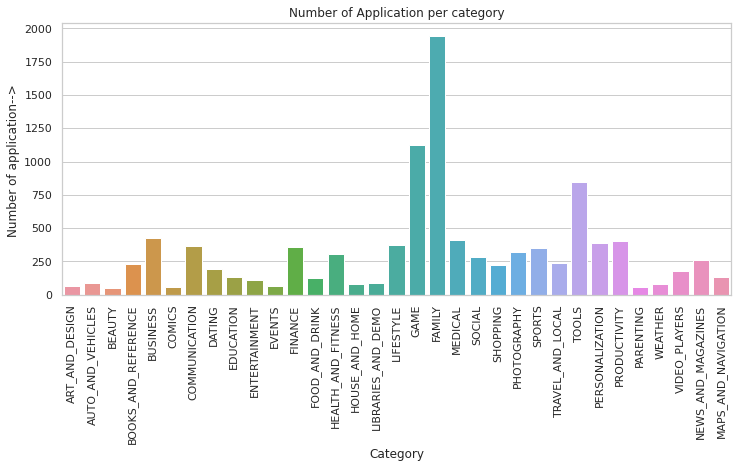

In [ ]:
# Let's get the number of application for each category


plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.countplot(x="Category",data=google_playstore_data);
plt.title("Number of Application per category")
plt.xlabel("Category")
plt.ylabel("Number of application--> ")
plt.xticks(rotation=90)
plt.show()




* From the above plotting we can understand that top 3 category "**Family**", "**Game**" and "**Tools**" which constitutes most number of application in the playstore.

## **2. Let's find out the distribution of size of the applications present in google play store**

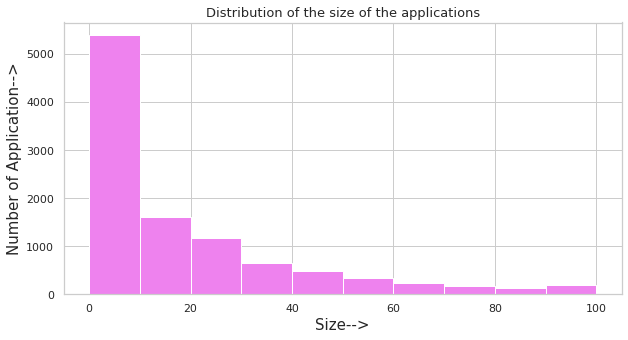

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Size-->", fontsize = 15)
plt.ylabel("Number of Application-->", fontsize = 15)
plt.title("Distribution of the size of the applications", fontsize = 13)
plt.hist(google_playstore_data["Size"], color="violet");
plt.show()


* **It can be seen from the above plot that maximum applications size lies between 0 to 10 mb.**

## **3. Let's find out the top genres according to their installation.** 

In [ ]:
# Let's see the uniques values of "Genres"


google_playstore_data["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
# Let's create a dataframe of the top 10 Genres according to their installation

Top_10_Installs = google_playstore_data.groupby("Genres")[["Installs"]].sum().sort_values(by="Installs", ascending=False).head(10)

In [ ]:
# Let's see the dataframe of the Genres vs Installs

Top_10_Installs.reset_index()

,Genres,Installs
0,Communication,2.415228e+10
1,Social,1.251387e+10
2,Productivity,1.246309e+10
3,Tools,1.144277e+10
4,Photography,9.721248e+09
5,Arcade,9.717129e+09
6,Casual,8.662831e+09
7,Action,8.336039e+09
8,Travel & Local,6.361787e+09
9,Video Players & Editors,6.207003e+09


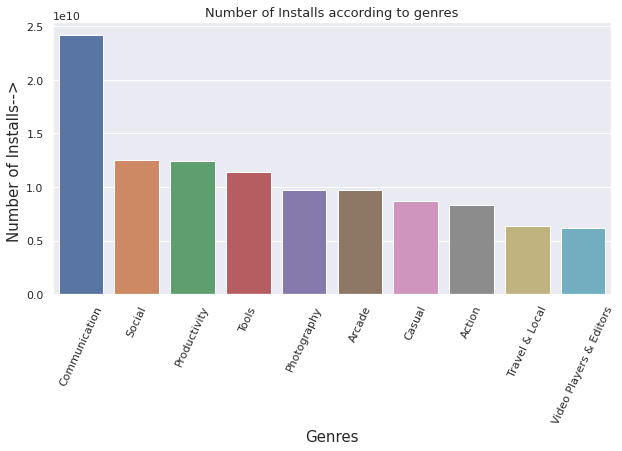

In [ ]:
# Now let's plot a bar graph to visualize the installation according to their genres.

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Genres", y= "Installs" , data=Top_10_Installs.reset_index());
plt.title("Number of Installs according to genres", fontsize = 13)
plt.xlabel("Genres", fontsize = 15)
plt.ylabel("Number of Installs--> ", fontsize = 15)
plt.xticks(rotation=65)
plt.show()


* From above we can conclude that **"Communication"**, **"Social"** &  **"Productivity"** Genres are the most Installed among others.

## **4. Let's find out the top Categories according to their installs**.

In [ ]:
# Let's create a dataframe of the top 10 Categories according to their installs.


Top_10_Category_of_apps = google_playstore_data.groupby("Category")[["Installs"]].sum().sort_values(by="Installs", ascending=False).head(10)

In [ ]:
# Let's see the dataframe.

Top_10_Category_of_apps.reset_index()

,Category,Installs
0,GAME,3.154402e+10
1,COMMUNICATION,2.415228e+10
2,SOCIAL,1.251387e+10
3,PRODUCTIVITY,1.246309e+10
4,TOOLS,1.145277e+10
5,FAMILY,1.004169e+10
6,PHOTOGRAPHY,9.721248e+09
7,TRAVEL_AND_LOCAL,6.361887e+09
8,VIDEO_PLAYERS,6.222003e+09
9,NEWS_AND_MAGAZINES,5.393218e+09


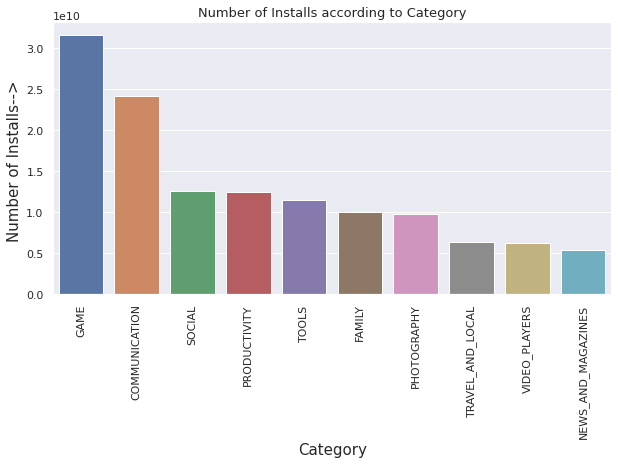

In [ ]:
# Let's get the Installs for each category


plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Category",y="Installs", data=Top_10_Category_of_apps.reset_index());
plt.title("Number of Installs according to Category", fontsize = 13)
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Number of Installs--> ", fontsize = 15)
plt.xticks(rotation=90)
plt.show()


* From above we can conclude that "Game", "Communication", "Social" & "Productivity" Categories are the most Installed among others.

## **5. Now Let's find out Number of Installs according to their size.**

In [ ]:
Installs_according_to_size = google_playstore_data.groupby("Size")[["Installs"]].sum().sort_values(by="Installs",ascending=False).head(10)

In [ ]:
Installs_according_to_size.reset_index()

,Size,Installs
0,0.0,8.854259e+10
1,76.0,5.189110e+09
2,13.0,3.621252e+09
3,74.0,2.827111e+09
4,24.0,2.669222e+09
5,62.0,2.567552e+09
6,11.0,1.772563e+09
7,17.0,1.629006e+09
8,61.0,1.534723e+09
9,40.0,1.337317e+09


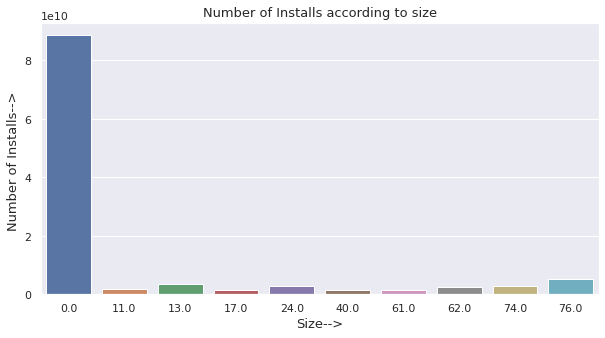

In [ ]:
# Now let's plot a bar graph to visualize the installation according to their Size.

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Size", y= "Installs" , data = Installs_according_to_size.reset_index());
plt.title("Number of Installs according to size",fontsize = 13)
plt.xlabel("Size-->", fontsize = 13)
plt.ylabel("Number of Installs--> ", fontsize = 13)
plt.xticks(rotation=0)
plt.show()

* **From above we can say that low size applications are installed most.**

## **6. Let's identify number of application present in the google playstore on the basis of rating.**

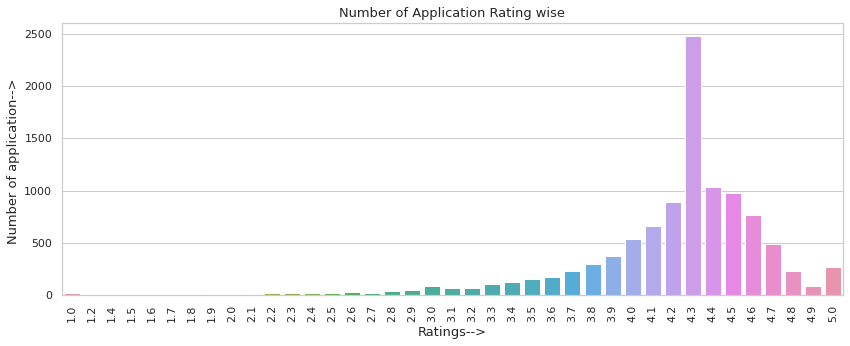

In [ ]:
# Let's get the number of application rating wise


plt.figure(figsize=(14,5))
sns.set(style="whitegrid")
sns.countplot(x="Rating", data = google_playstore_data);
plt.title("Number of Application Rating wise", fontsize = 13)
plt.xlabel("Ratings-->", fontsize = 13)
plt.ylabel("Number of application--> ", fontsize = 13)
plt.xticks(rotation=90)
plt.show()


* **We can conclude from the above plotting that most of the application in the google playstore are having ratings in between 4 and 4.7.**

## **7. Let's see number of application Installed as per the Ratings of the application.**  

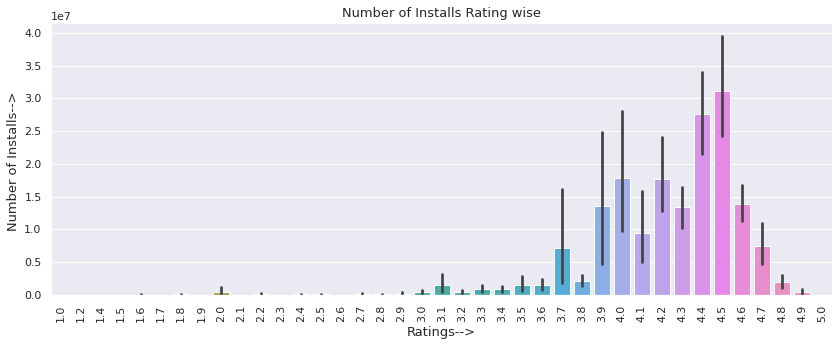

In [ ]:
plt.figure(figsize=(14,5))
sns.set(style="darkgrid")
sns.barplot(x="Rating", y = "Installs",  data = google_playstore_data);
plt.title("Number of Installs Rating wise", fontsize = 13)
plt.xlabel("Ratings-->", fontsize = 13)
plt.ylabel("Number of Installs--> ", fontsize = 13)
plt.xticks(rotation=90)
plt.show()


* **We can conclude from the above plot that number of installs are higher in case Rating is in between 3.7 to 4.7**

## **8. Next we are going to find out most Installed Applications**

In [ ]:
# Let's find out most Installed apllications in Google Play Store


Most_installed_applications = google_playstore_data.groupby(["App"])[["Installs"]].sum().sort_values(by="Installs", ascending=False).head(15)

In [ ]:
Most_installed_applications.reset_index()

,App,Installs
0,Subway Surfers,5.000000e+09
1,Google Photos,4.000000e+09
2,Hangouts,4.000000e+09
3,Google News,3.000000e+09
4,Google Chrome: Fast & Secure,3.000000e+09
5,Google Drive,3.000000e+09
6,Maps - Navigate & Explore,3.000000e+09
7,Instagram,3.000000e+09
8,Candy Crush Saga,2.500000e+09
9,Temple Run 2,2.500000e+09


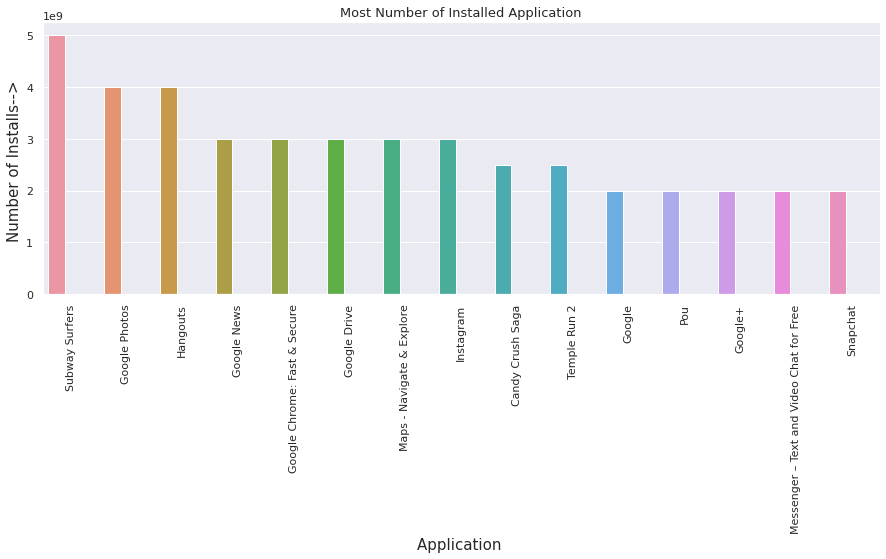

In [ ]:
# Let's plot a bar graph to visualize top 15 most installed applications.


plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.barplot(x="App", y = "Installs", Width = 0.3, data = Most_installed_applications.reset_index());
plt.title("Most Number of Installed Application", fontsize = 13)
plt.xlabel("Application ", fontsize = 15)
plt.ylabel("Number of Installs--> ", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* **From above plot we can conclude that top 3 most number of installed applications are "Subway Surfers","Google Photos" & "Hangouts".**

## **9. Next we are going to find out most respond type**

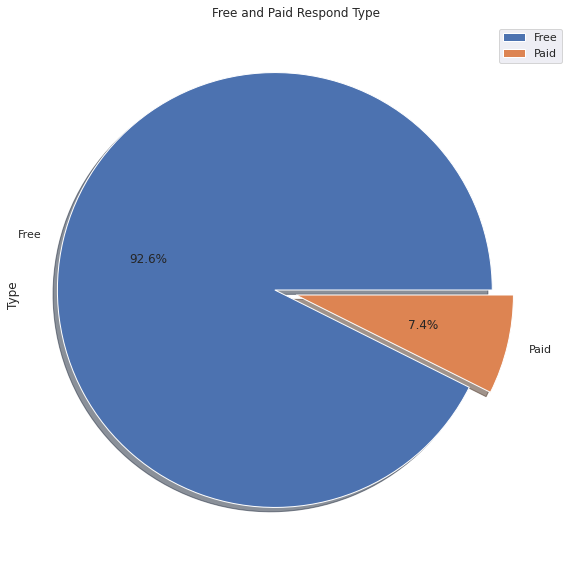

In [ ]:
# Let's plot a pie chart to visualize the most respond type.


plt.figure(figsize=(15,10))
explode = [0.1,0]
google_playstore_data["Type"].value_counts().plot(kind="pie", autopct = "%1.1f%%", explode=explode, shadow = True)
plt.title("Free and Paid Respond Type")
plt.legend()
plt.show()

* **From the above pie plot we can say that in google playstore free type applications are majorly available compare to paid.**

## **10. Installation according to type**

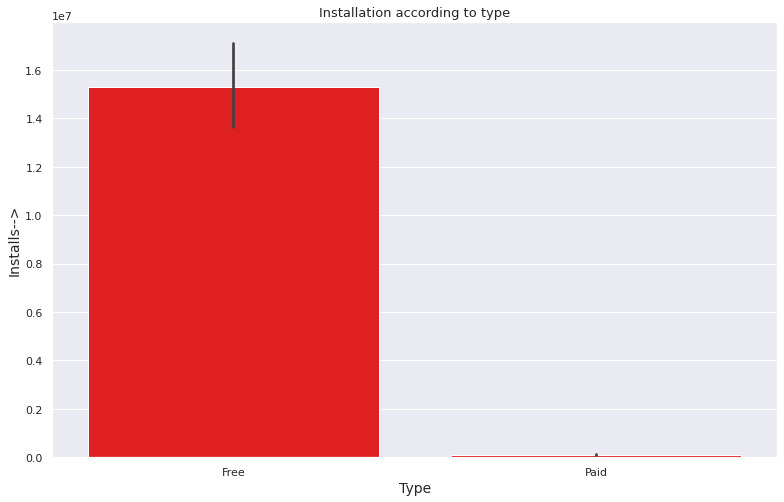

In [ ]:
# Let's see the plot installations according to type

plt.figure(figsize=(13,8))
plt.title("Installation according to type", fontsize = 13)
sns.barplot(x = "Type", y = "Installs", color="red", data = google_playstore_data);
plt.xlabel("Type", fontsize = 14)
plt.ylabel("Installs-->", fontsize = 14)
plt.show()




* **From above plot we can conclude that free applications are mostly installed by users compare to paid applications.**

## **11. Top 10 Paid Category of Application In Terms of Installs.**

In [ ]:
# let's create a dataframe for top 10 paid apps in playstore.

Top_10_Paid_applications_dataframe = google_playstore_data[google_playstore_data["Type"]=="Paid"]
Top_10_Paid_Apps = Top_10_Paid_applications_dataframe.groupby(["Type","Category"])[["Installs"]].sum().sort_values(by="Installs", ascending=False).head(10)
Top_10_Paid_Apps.reset_index()



,Type,Category,Installs
0,Paid,FAMILY,31200814.0
1,Paid,GAME,21099965.0
2,Paid,PERSONALIZATION,4258794.0
3,Paid,PHOTOGRAPHY,1978740.0
4,Paid,TOOLS,1727441.0
5,Paid,PRODUCTIVITY,1412055.0
6,Paid,COMMUNICATION,1360050.0
7,Paid,SPORTS,1243815.0
8,Paid,LIFESTYLE,1179110.0
9,Paid,WEATHER,812000.0


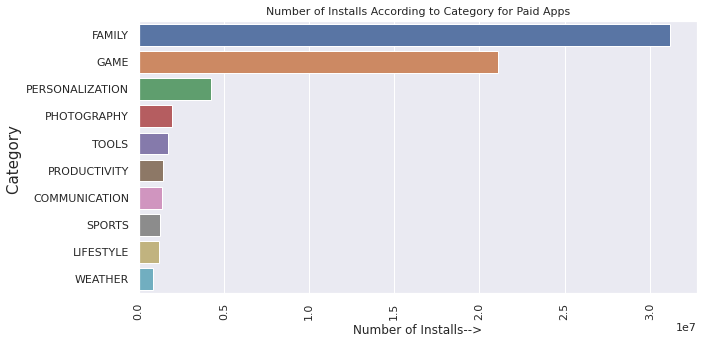

In [ ]:
# Now let's plot a bar graph to visualize the installation according to Paid category.

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="Installs", y= "Category" , data=Top_10_Paid_Apps.reset_index());
plt.title("Number of Installs According to Category for Paid Apps", fontsize = 11)
plt.xlabel("Number of Installs-->", fontsize = 12)
plt.ylabel("Category ", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* **From above plot we can understand that in "Family", "Game" category Paid apps are mostly installed**

## **12. Now let's see a plot for different range of price per category**

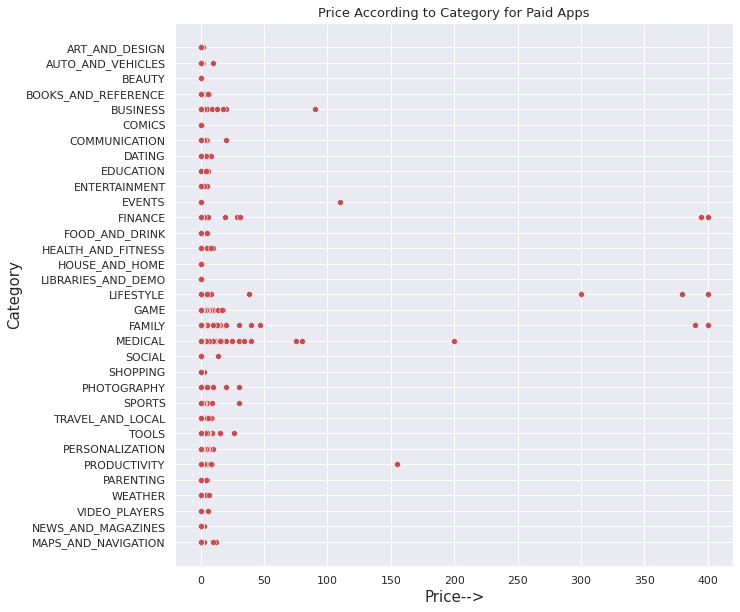

In [ ]:
# Let's plot category vs price scatter plot


plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.scatterplot(x = "Price", y = "Category" , data = google_playstore_data.reset_index(), color = "r");
plt.title("Price According to Category for Paid Apps", fontsize = 13)
plt.xlabel("Price-->", fontsize = 15)
plt.ylabel("Category", fontsize = 15)
plt.xticks(rotation=0)
plt.show()

* **From the above plot we can understand that maximum apps are free and the lifestyle, finance and family category apps have the highest cost which can be upto $400.**

## **13. Content Rating on Apps -**

In [ ]:

# Let's create a dataframe of content ratings

Content_Rating_on_Apps = google_playstore_data["Content Rating"].value_counts().reset_index()
Content_Rating_on_Apps

,index,Content Rating
0,Everyone,8382
1,Teen,1146
2,Mature 17+,447
3,Everyone 10+,377
4,Adults only 18+,3
5,Unrated,2


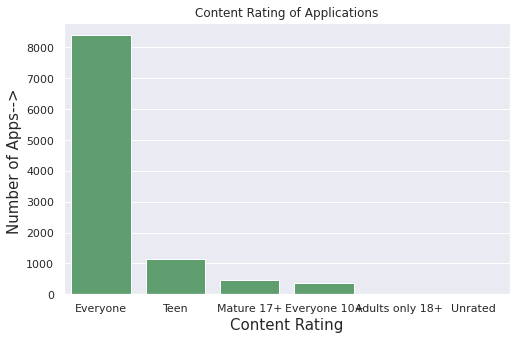

In [ ]:
# Let's plot a barplot to understand maximum content ratings for number of application. 


plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
sns.barplot(x = "index",y = "Content Rating", data = Content_Rating_on_Apps, color="g")
plt.title("Content Rating of Applications")
plt.xlabel("Content Rating", fontsize = 15)
plt.ylabel("Number of Apps--> ", fontsize = 15)
plt.xticks(rotation=0)
plt.show()

* **From the above plot we can see that "Everyone" category has the highest number of application**

## **14. Number of Installs against Content Ratings.**

In [ ]:
content_ratings_with_installs = google_playstore_data.groupby(["Content Rating"])[["Installs"]].sum().sort_values(by="Installs", ascending=False).head(10)

In [ ]:
content_ratings_with_installs.reset_index()

,Content Rating,Installs
0,Everyone,1.002296e+11
1,Teen,3.091828e+10
2,Everyone 10+,1.119127e+10
3,Mature 17+,4.290697e+09
4,Adults only 18+,2.000000e+06
5,Unrated,5.050000e+04


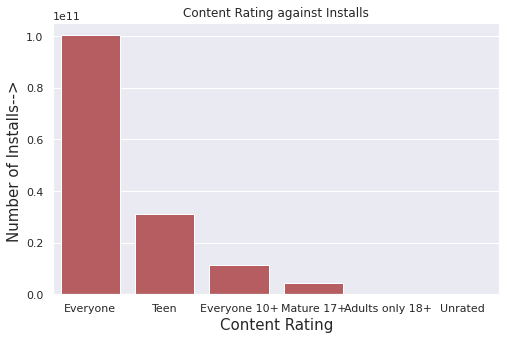

In [ ]:
# Let's plot a barplot to understand Installs vs Content Ratings. 


plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
sns.barplot(y ="Installs",x = "Content Rating", data = content_ratings_with_installs.reset_index(), color="r")
plt.title("Content Rating against Installs")
plt.xlabel("Content Rating", fontsize = 15)
plt.ylabel("Number of Installs--> ", fontsize = 15)
plt.xticks(rotation=0)
plt.show()

* **We can say from above plots that number of apps are high in case of Everyone category as well as number of installs are also high in Everyone category.**

# **Now let's add User Review csv file** 



> Merging dataframes on apps.



In [ ]:
user_review_file_path = "/content/drive/MyDrive/Colab Notebooks/Play Store App Review Analysis - Kousik Dutta/Copy of User Reviews.csv"
user_review_data = pd.read_csv(user_review_file_path)

In [ ]:
# let's merge our new with previous dataset

user_review_merged = google_playstore_data.merge(user_review_data, on = "App")

In [ ]:
# Let's see the top 5 rows of the dataset.

user_review_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [ ]:
# let's see the column names of the merged dataset.

user_review_merged.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

## **In our new dataframe we have four new columns, let's describe the columns -**



*   **Translated_Review** = This column shows about the reviews.
*   **Sentiment** = Sentiment basically means the attitude of the writer, and the, it may be positive, Negative or neutral.
*   **Sentiment_Polarity** = Sentiment Polarity lies between -1 to 1, where -1 refers to Negative statement and 1 refers to positive statement.
*   **Sentiment_Subjectivity** = It generally refer to personal opinion, emotion or judgement, which lies in the range of [0,1]. 



## **15. Percentage of review sentiments -**

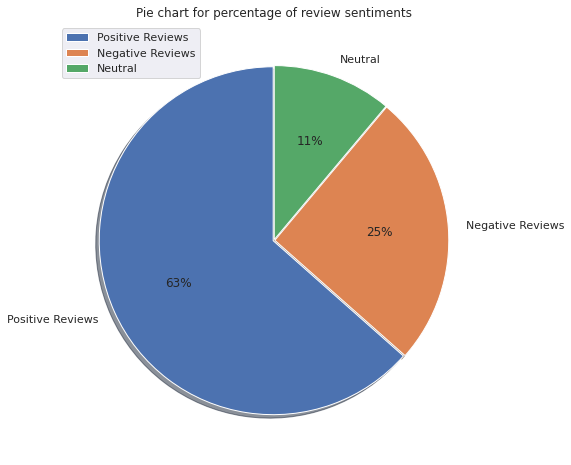

In [ ]:
# Let's plot a pie chart representing the percentage of review sentiments - 

sentiment_counts = user_review_merged["Sentiment"].value_counts()
plt.rcParams["figure.figsize"] = (8,8)
labels = "Positive Reviews", "Negative Reviews", "Neutral"
plt.pie(sentiment_counts,labels=labels, explode = [0.005,0.005,0.005], autopct = "%2i%%",shadow=True, startangle = 90);
plt.title("Pie chart for percentage of review sentiments")
plt.legend()
plt.show()


* From the above pie plot it can be seen that in google playstore review section it has 63% positive reviews, 25% are negative reviews and 11% are of neutral reviews.

## **16. Number of Installs Sentiment wise according to Genres**

In [ ]:
Category_Sentiment =  user_review_merged.groupby(["Category","Sentiment"]).size().reset_index(name="Sentiment_count")
print(Category_Sentiment)

             Category Sentiment  Sentiment_count
0      ART_AND_DESIGN  Negative               61
1      ART_AND_DESIGN   Neutral               62
2      ART_AND_DESIGN  Positive              259
3   AUTO_AND_VEHICLES  Negative               17
4   AUTO_AND_VEHICLES   Neutral               36
..                ...       ...              ...
94      VIDEO_PLAYERS   Neutral               58
95      VIDEO_PLAYERS  Positive              190
96            WEATHER  Negative               33
97            WEATHER   Neutral               35
98            WEATHER  Positive              165

[99 rows x 3 columns]


In [ ]:
Category_Sentiment["log_sentiment_count"] = np.log2(Category_Sentiment["Sentiment_count"])

In [ ]:
# Let's see the top 5 rows of the Category Sentiment dataframe.

Category_Sentiment.head()

,Category,Sentiment,Sentiment_count,log_sentiment_count
0,ART_AND_DESIGN,Negative,61,5.930737
1,ART_AND_DESIGN,Neutral,62,5.954196
2,ART_AND_DESIGN,Positive,259,8.016808
3,AUTO_AND_VEHICLES,Negative,17,4.087463
4,AUTO_AND_VEHICLES,Neutral,36,5.169925


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


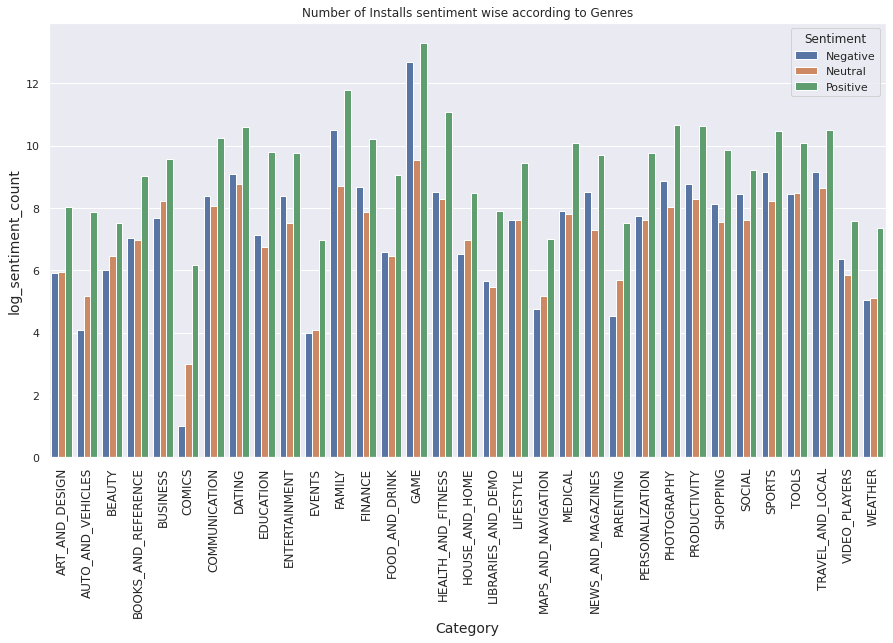

In [ ]:
# let's plot the distribution of the number of Installs type wise according to Genres.

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel("Category", fontsize = 14)
plt.ylabel("Installs", fontsize = 14)
plt.title("Number of Installs sentiment wise according to Genres")
sns.barplot("Category", "log_sentiment_count", hue = "Sentiment", data = Category_Sentiment);
plt.show()


* **It can be seen from above plot that number of positive sentiments are way higher than negative and neutral sentiments, and "Game" Category has the highest positive and negative sentiment.**

# **17. Now Let's Plot a Histogram of Sentiment Subjectivity -**

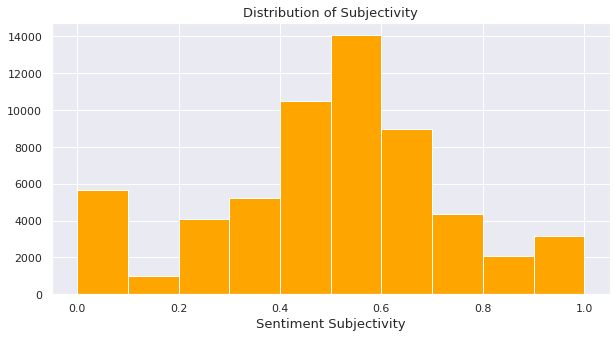

In [ ]:
plt.figure(figsize = (10,5))
plt.xlabel("Sentiment Subjectivity", fontsize = 13)
plt.title("Distribution of Subjectivity", fontsize = 13)
plt.hist(user_review_merged[user_review_merged["Sentiment_Subjectivity"].notnull()]["Sentiment_Subjectivity"], color = "Orange");
plt.show()


* **It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give feedback based on their expeirence.**

# **Conclusion -**

The Google Play Store apps report provides some useful insights regarding the trending of the apps in the play store, as per the graphs and visualization shown above, most of the trending apps in terms of user installs are from the categories "Game", " Communication", "Tool".
Other than that the chart above shows that most of the apps in the play store has a rating more than 4.0. Furthermore most of the apps that are having high amount of reviews are from the category of "Game", "Communication", "Dating", "Family", "Health and fitness", "Medical", "Productivity", Eventhough apps from the categories like "Game", "Social", "Communication", "Tool", "Productivity" are having highest amount of installs. As a conclusion, we learnt that the current trend in the android market are mostly from these categories which either assisting, communicating or entertaining apps. 


After Completion of this project we got some conclusions  

*   User prefer to install free applications more.
*   Communication, Entertainment, Game, Social  category apps are in high demand for all type of users.
*   Maximum applications content ratings are for everyone.
*   user installs application according to previous rating and reviews , as we have seen that higher ratings are having higher installs.



